# Basic Audio Exploratory Data Analysis

This notebook demonstrates how to perform basic exploratory data analysis on audio files using the CTC-SpeechRefinement package.

## Setup

First, let's import the necessary libraries and set up the environment.

In [1]:
# Add the project root to the Python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
from IPython.display import Audio, display
import glob
from pathlib import Path

# Import from the project
from ctc_speech_refinement.core.preprocessing.audio import load_audio
from ctc_speech_refinement.core.eda.descriptive_stats import analyze_descriptive_stats
from ctc_speech_refinement.core.eda.time_domain import analyze_time_domain
from ctc_speech_refinement.core.eda.frequency_domain import analyze_frequency_domain
from ctc_speech_refinement.core.eda.pitch_timbre import analyze_pitch_timbre
from ctc_speech_refinement.core.eda.anomaly_detection import analyze_anomalies

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

/home/ngocducpc/miniconda3/envs/speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Audio Data

Let's load an audio file and examine its basic properties using our package's load_audio function.

In [2]:
# Define the path to an audio file
audio_file = "../data/errordetect/test2_01.wav"  # Path to the audio file

# Load the audio file using our package's function
audio_data, sample_rate = load_audio(audio_file)

# Print basic information
print(f"Audio file: {audio_file}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(audio_data)}")

# Play the audio
display(Audio(audio_data, rate=sample_rate))

2025-05-07 19:11:02,163 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/errordetect/test2_01.wav
2025-05-07 19:11:02,937 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (33200,) and sample rate 16000


Audio file: ../data/errordetect/test2_01.wav
Sample rate: 16000 Hz
Duration: 2.08 seconds
Number of samples: 33200


## Descriptive Statistics Analysis

Let's use our package's analyze_descriptive_stats function to compute and visualize descriptive statistics of the audio data.

2025-05-07 19:11:02,945 - ctc_speech_refinement.core.eda.descriptive_stats - INFO - Performing descriptive statistics analysis
2025-05-07 19:11:02,946 - ctc_speech_refinement.core.eda.descriptive_stats - INFO - Calculating basic statistics
2025-05-07 19:11:02,949 - ctc_speech_refinement.core.eda.descriptive_stats - INFO - Plotting amplitude distribution
2025-05-07 19:11:03,013 - ctc_speech_refinement.core.eda.descriptive_stats - INFO - Plotting statistics summary
2025-05-07 19:11:03,037 - ctc_speech_refinement.core.eda.descriptive_stats - INFO - Plotting dynamic metrics



Descriptive Statistics:
mean: 9.878889250103384e-05
std: 0.1289951205253601
min: -0.7863177061080933
max: 0.5939909815788269
median: 0.0024133767001330853
q1: -0.04102293960750103
q3: 0.06745916418731213
iqr: 0.10848210379481316
skewness: -0.6422321796417236
kurtosis: 3.208470582962036
rms: 0.1289951652288437
crest_factor: 6.095714569091797
dynamic_range: 1.3803086280822754
zero_crossings: 2956
duration: 2.075
sample_rate: 16000
num_samples: 33200


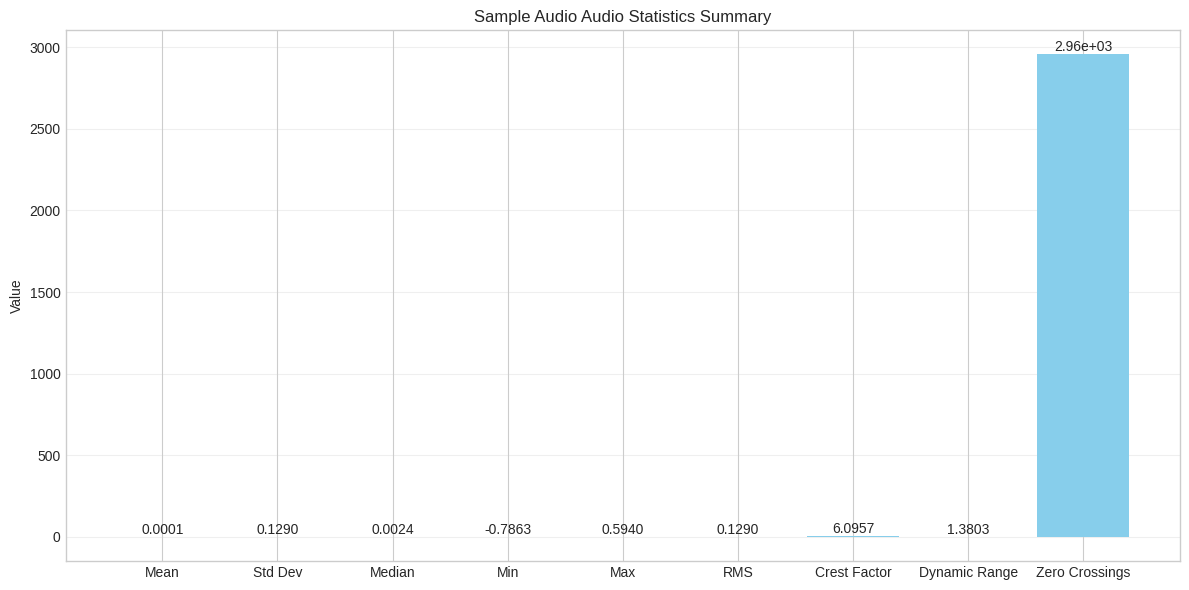

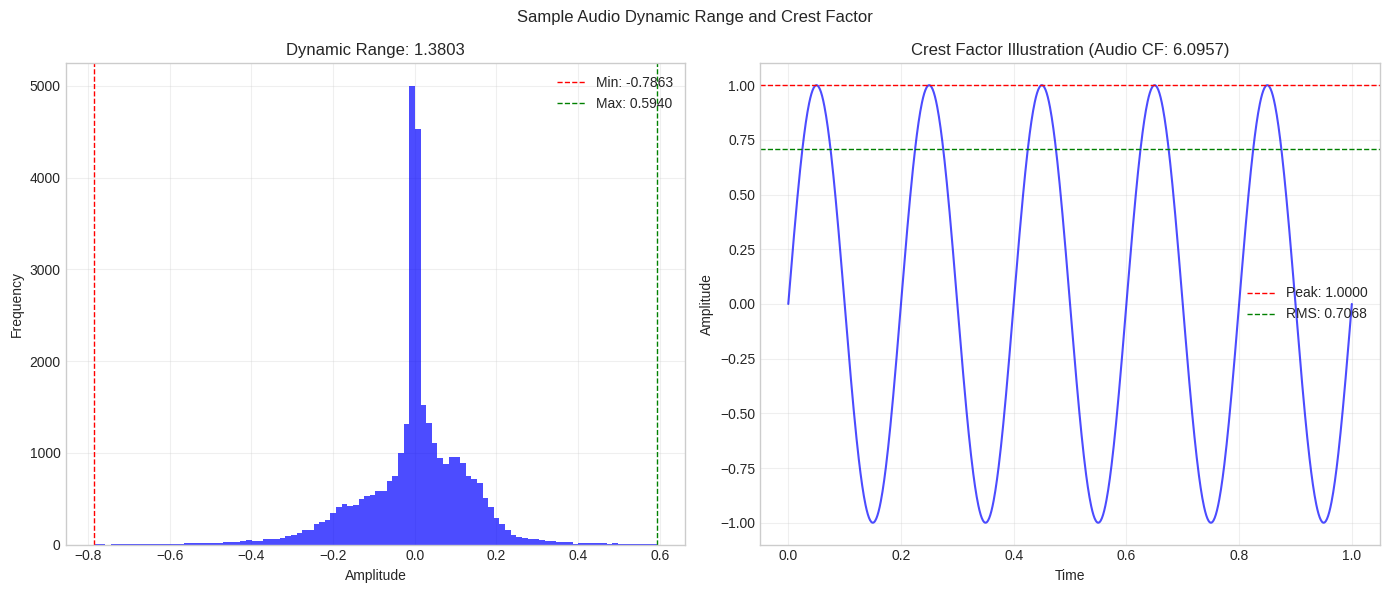

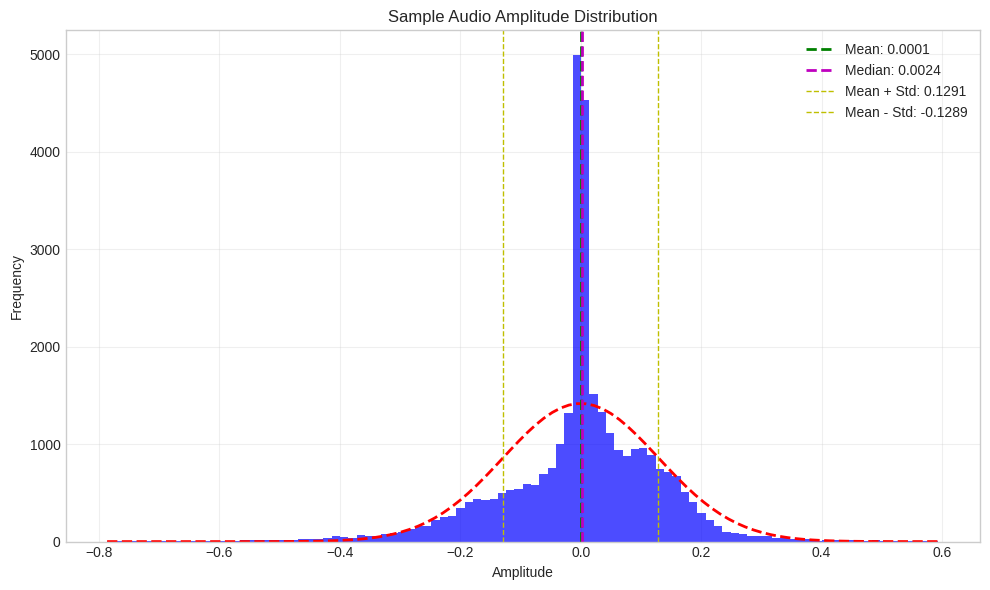

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [3]:
# Use our package's function to analyze descriptive statistics
descriptive_stats_results = analyze_descriptive_stats(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the statistics
print("\nDescriptive Statistics:")
for stat, value in descriptive_stats_results['stats'].items():
    print(f"{stat}: {value}")

# Display the figures
for fig_name, fig in descriptive_stats_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Time Domain Analysis

Let's use our package's analyze_time_domain function to analyze the audio in the time domain.

2025-05-07 19:11:03,383 - ctc_speech_refinement.core.eda.time_domain - INFO - Performing time domain analysis
2025-05-07 19:11:03,383 - ctc_speech_refinement.core.eda.time_domain - INFO - Plotting audio waveform
2025-05-07 19:11:03,410 - ctc_speech_refinement.core.eda.time_domain - INFO - Plotting audio envelope
2025-05-07 19:11:03,496 - ctc_speech_refinement.core.eda.time_domain - INFO - Plotting audio energy
2025-05-07 19:11:03,515 - ctc_speech_refinement.core.eda.time_domain - INFO - Plotting zero crossing rate
2025-05-07 19:11:03,534 - ctc_speech_refinement.core.eda.time_domain - INFO - Detecting silent regions
2025-05-07 19:11:03,534 - ctc_speech_refinement.core.eda.time_domain - INFO - Detected 0 silent regions
2025-05-07 19:11:03,535 - ctc_speech_refinement.core.eda.time_domain - INFO - Plotting silence detection


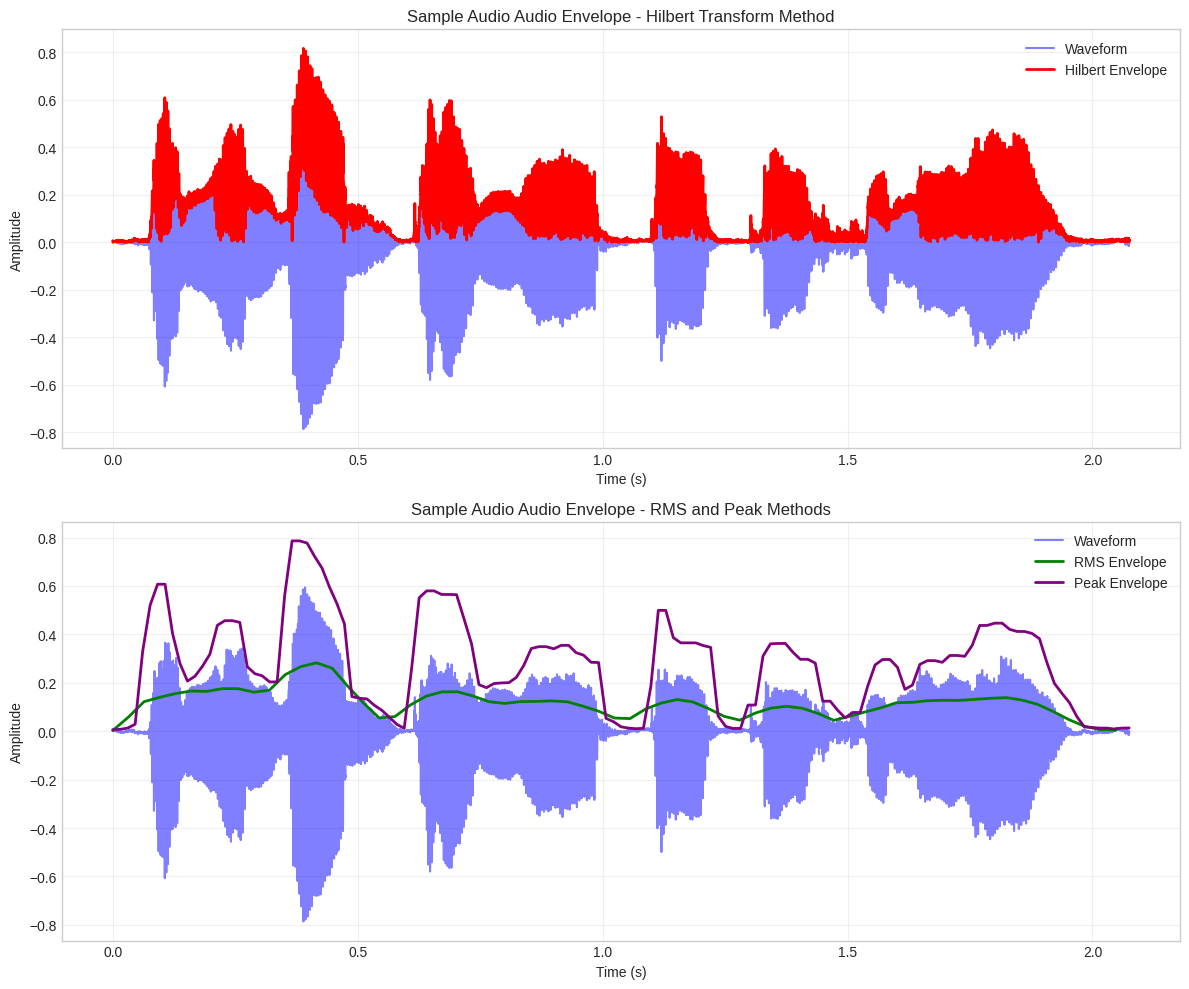

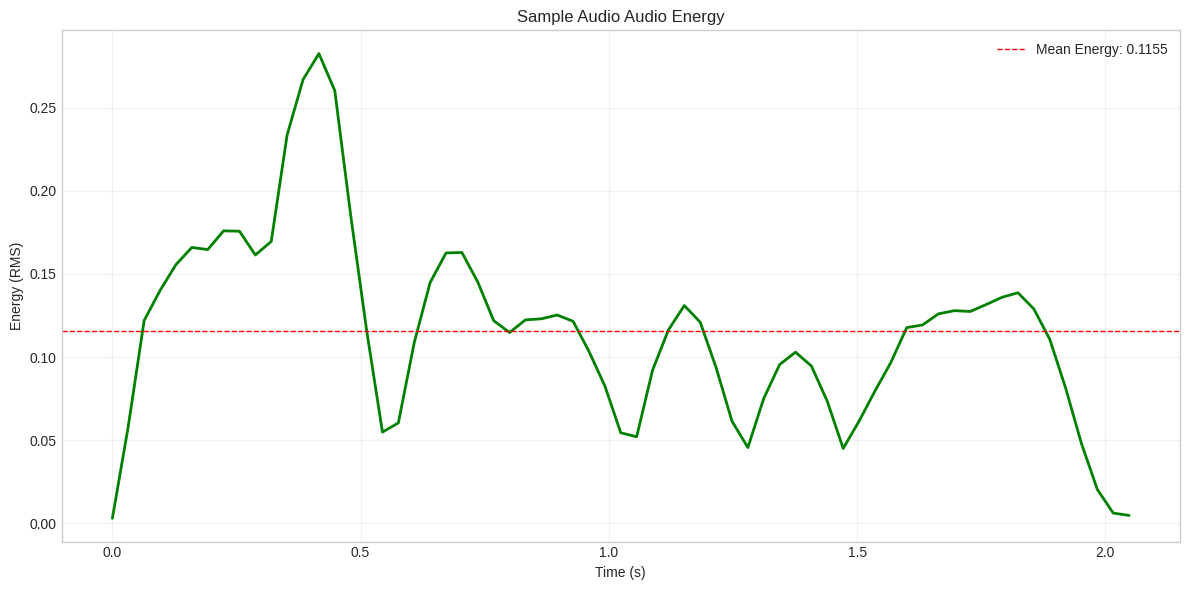

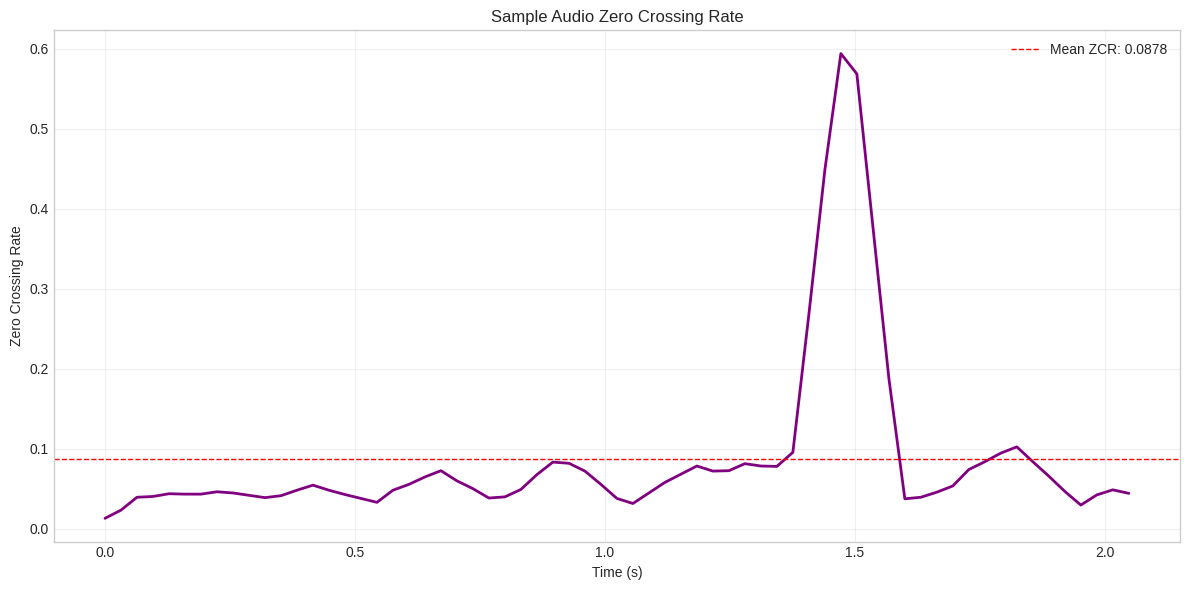

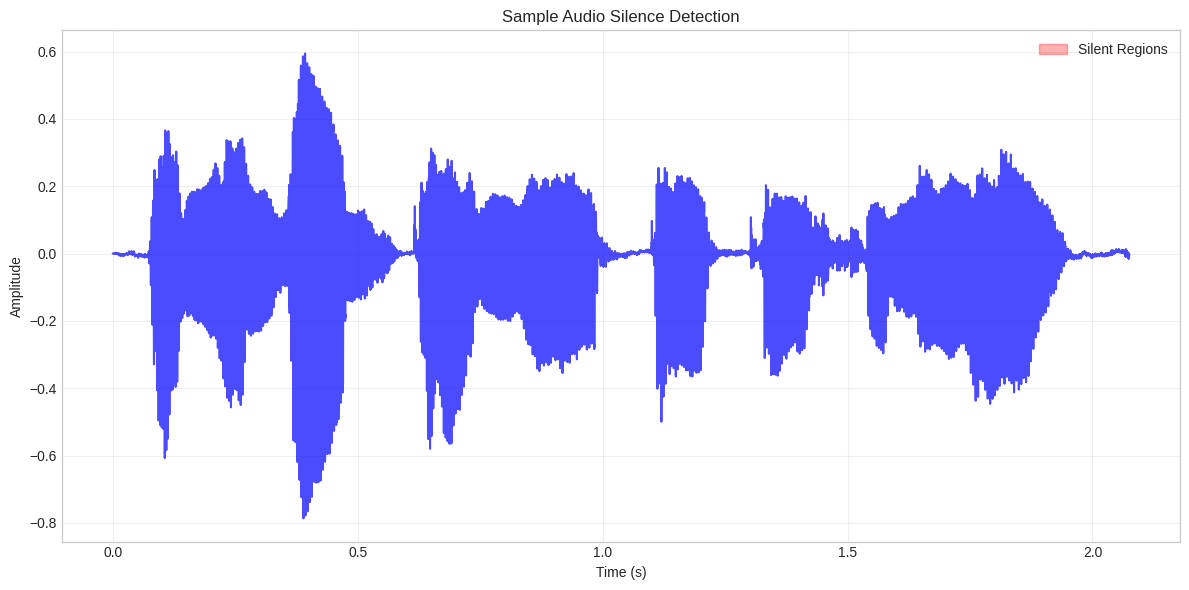

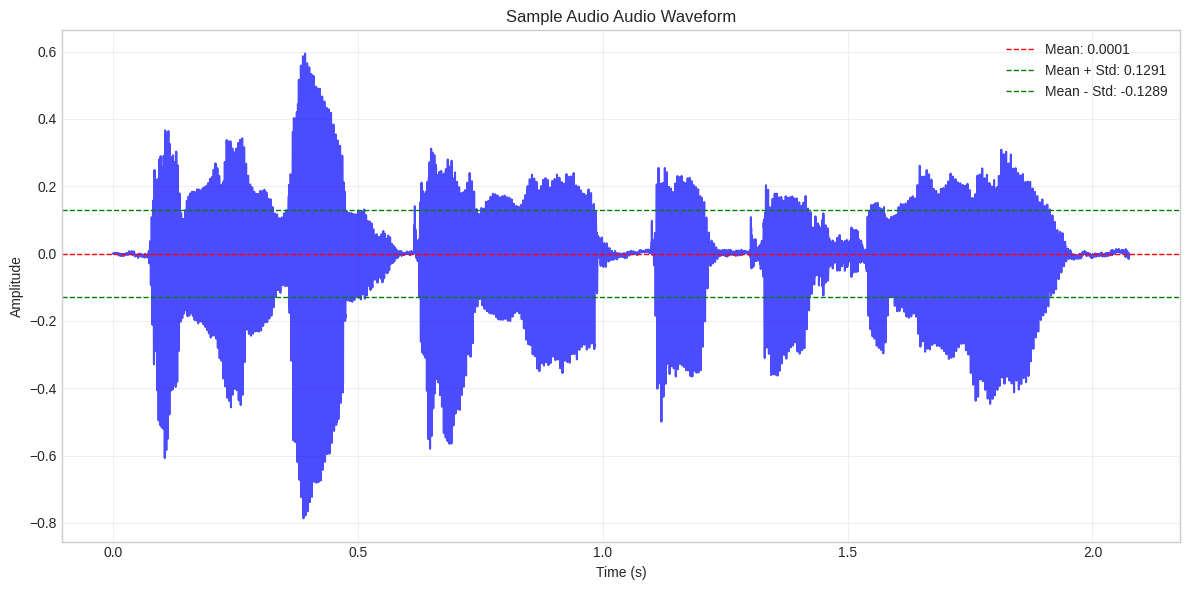

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
# Use our package's function to analyze time domain features
time_domain_results = analyze_time_domain(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the figures
for fig_name, fig in time_domain_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Frequency Domain Analysis

Let's use our package's analyze_frequency_domain function to analyze the audio in the frequency domain.

2025-05-07 19:11:03,977 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Performing frequency domain analysis
2025-05-07 19:11:03,978 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Calculating spectral features
2025-05-07 19:11:03,982 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting FFT magnitude spectrum
2025-05-07 19:11:04,233 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectrogram
2025-05-07 19:11:04,269 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting mel spectrogram
2025-05-07 19:11:04,307 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting chromagram
2025-05-07 19:11:04,374 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectral contrast
2025-05-07 19:11:04,400 - ctc_speech_refinement.core.eda.frequency_domain - INFO - Plotting spectral features


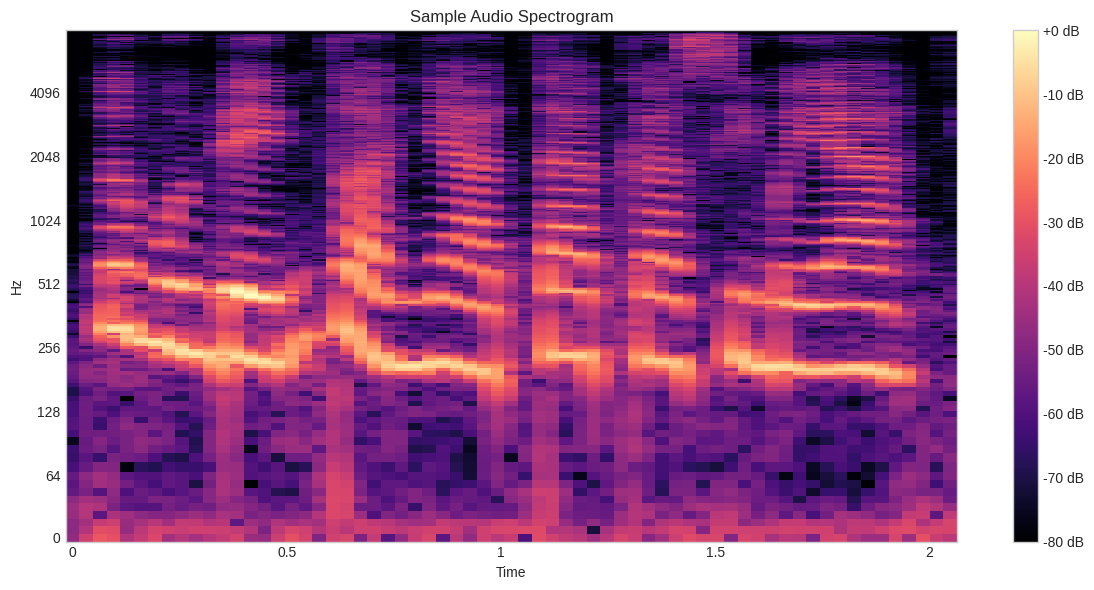

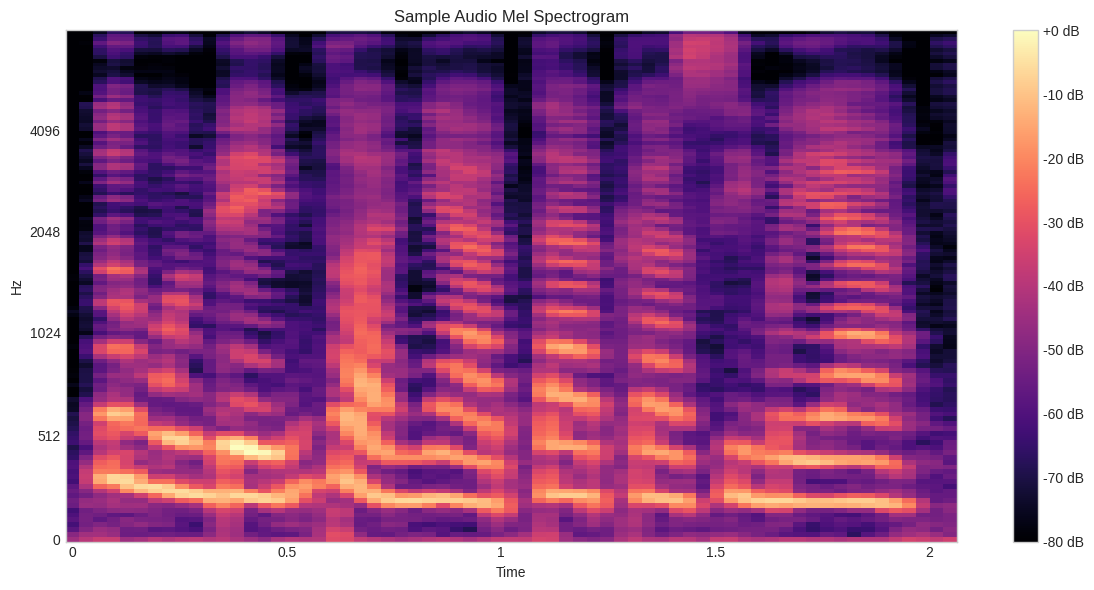

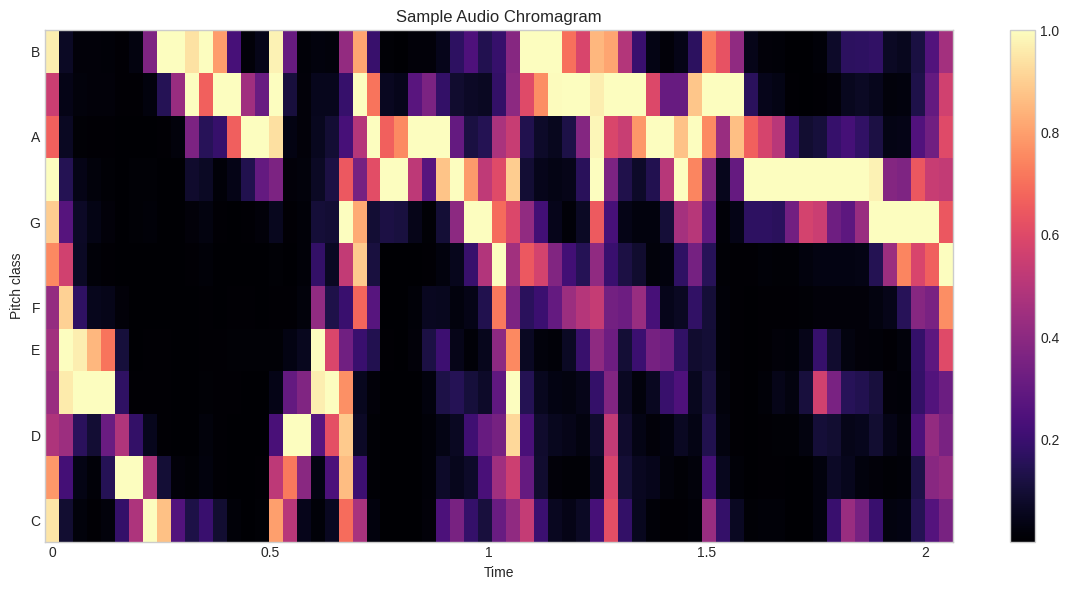

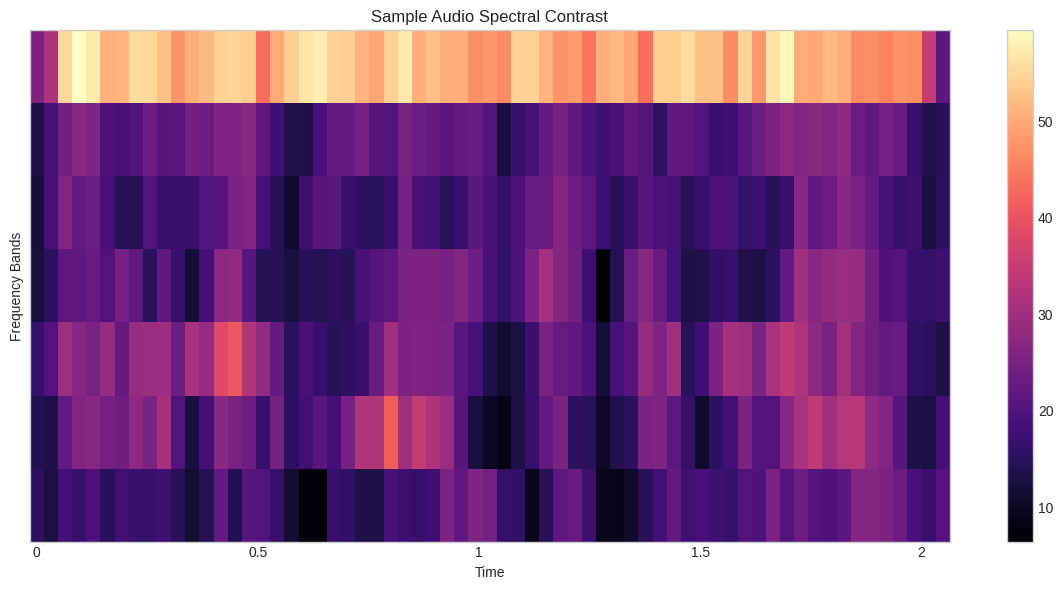

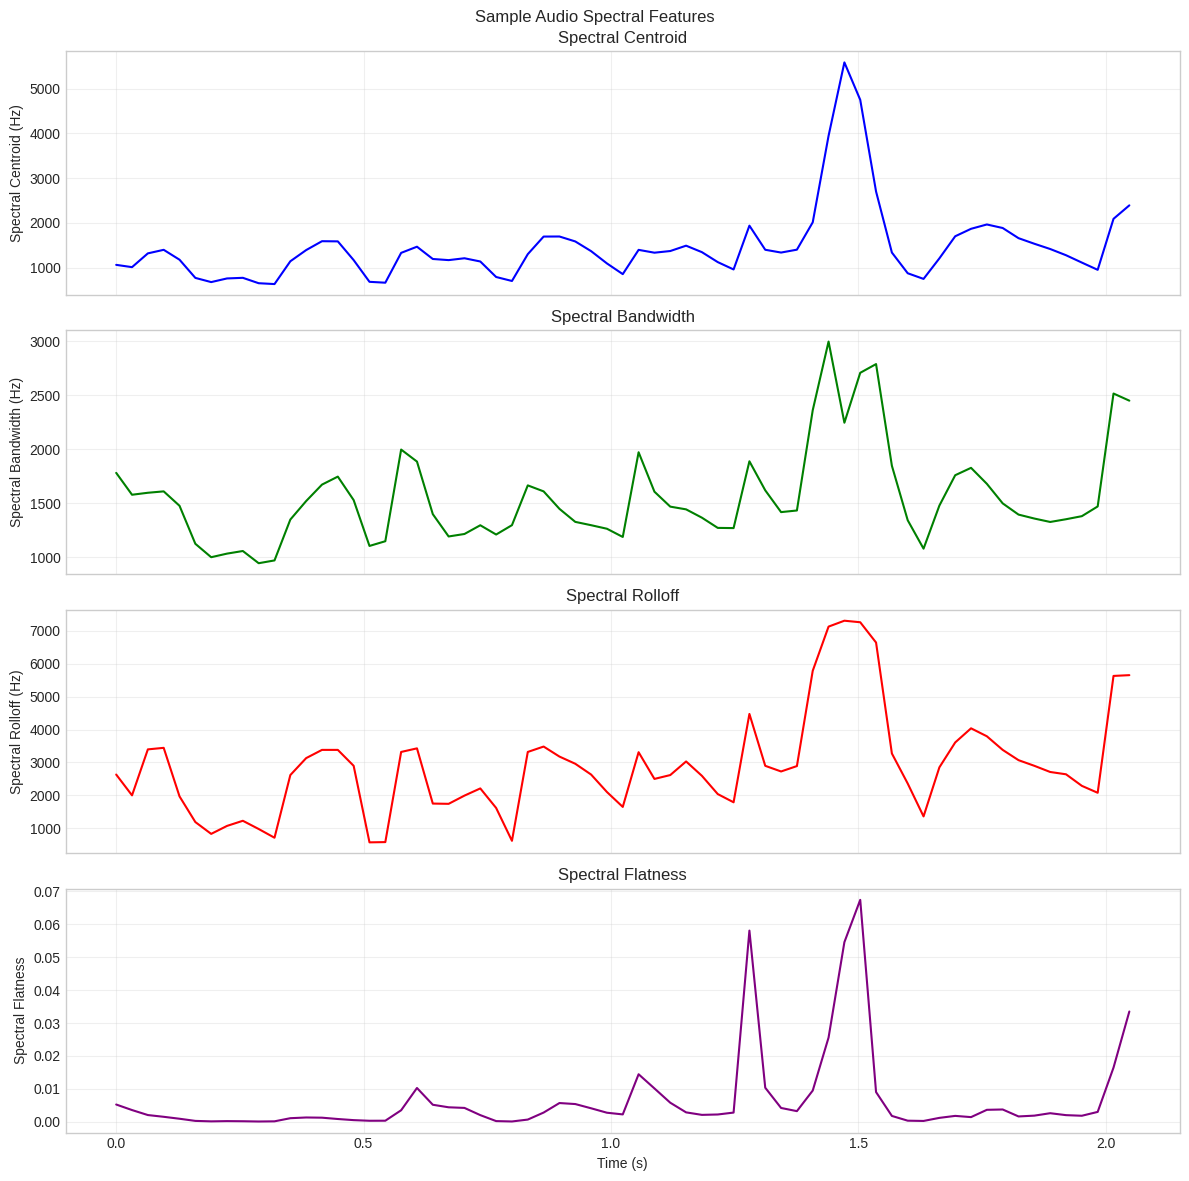

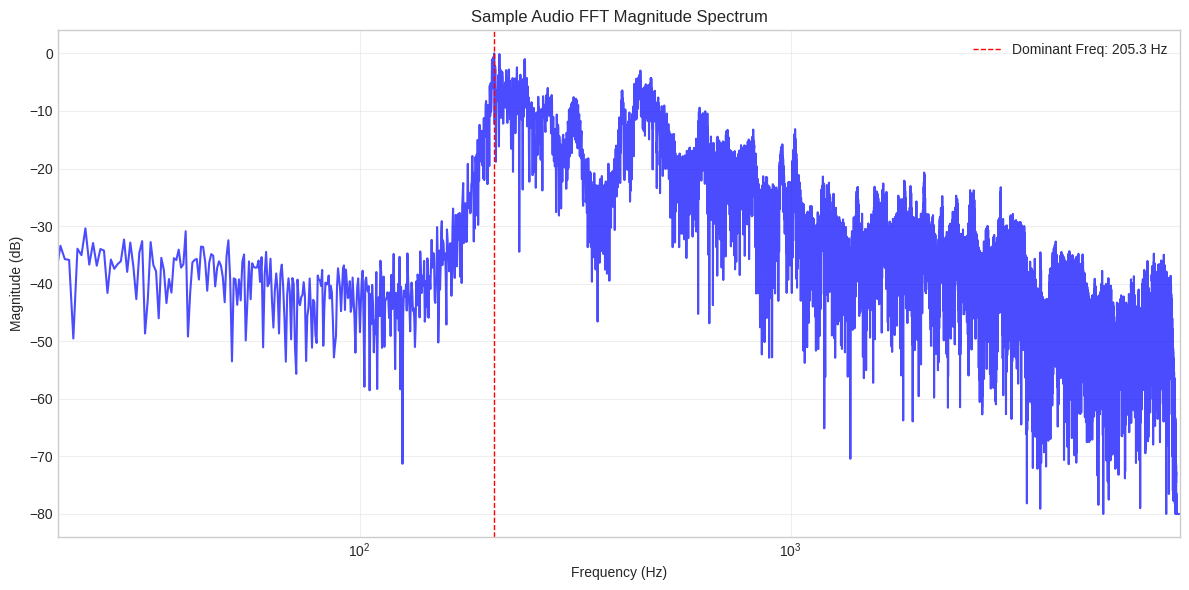

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
# Use our package's function to analyze frequency domain features
frequency_domain_results = analyze_frequency_domain(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the figures
for fig_name, fig in frequency_domain_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Pitch and Timbre Analysis

Let's use our package's analyze_pitch_timbre function to analyze the pitch and timbre characteristics of the audio.

2025-05-07 19:11:05,008 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Performing pitch and timbre analysis
2025-05-07 19:11:05,009 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Estimating pitch
2025-05-07 19:11:05,323 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Extracting 13 MFCC features for timbre analysis
2025-05-07 19:11:05,328 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting pitch estimation
2025-05-07 19:11:05,404 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting pitch distribution
2025-05-07 19:11:05,469 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting MFCC features
2025-05-07 19:11:05,500 - ctc_speech_refinement.core.eda.pitch_timbre - INFO - Plotting MFCC statistics


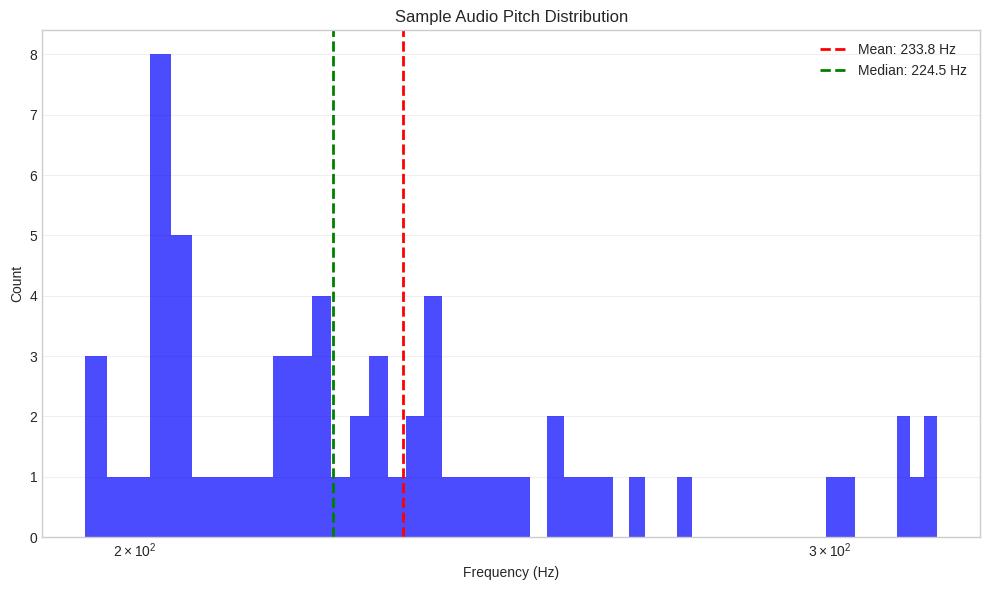

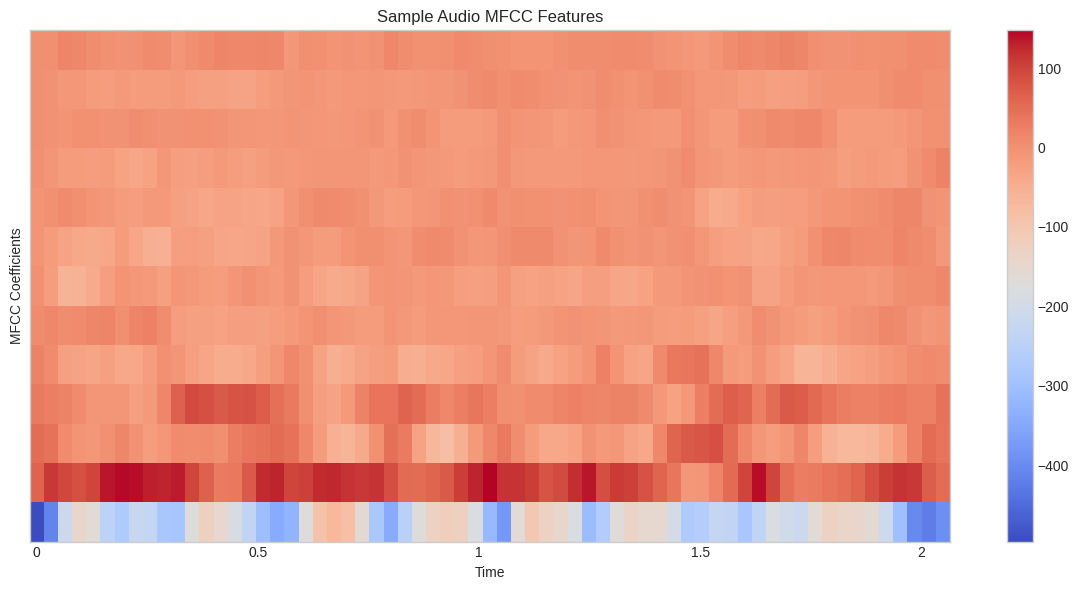

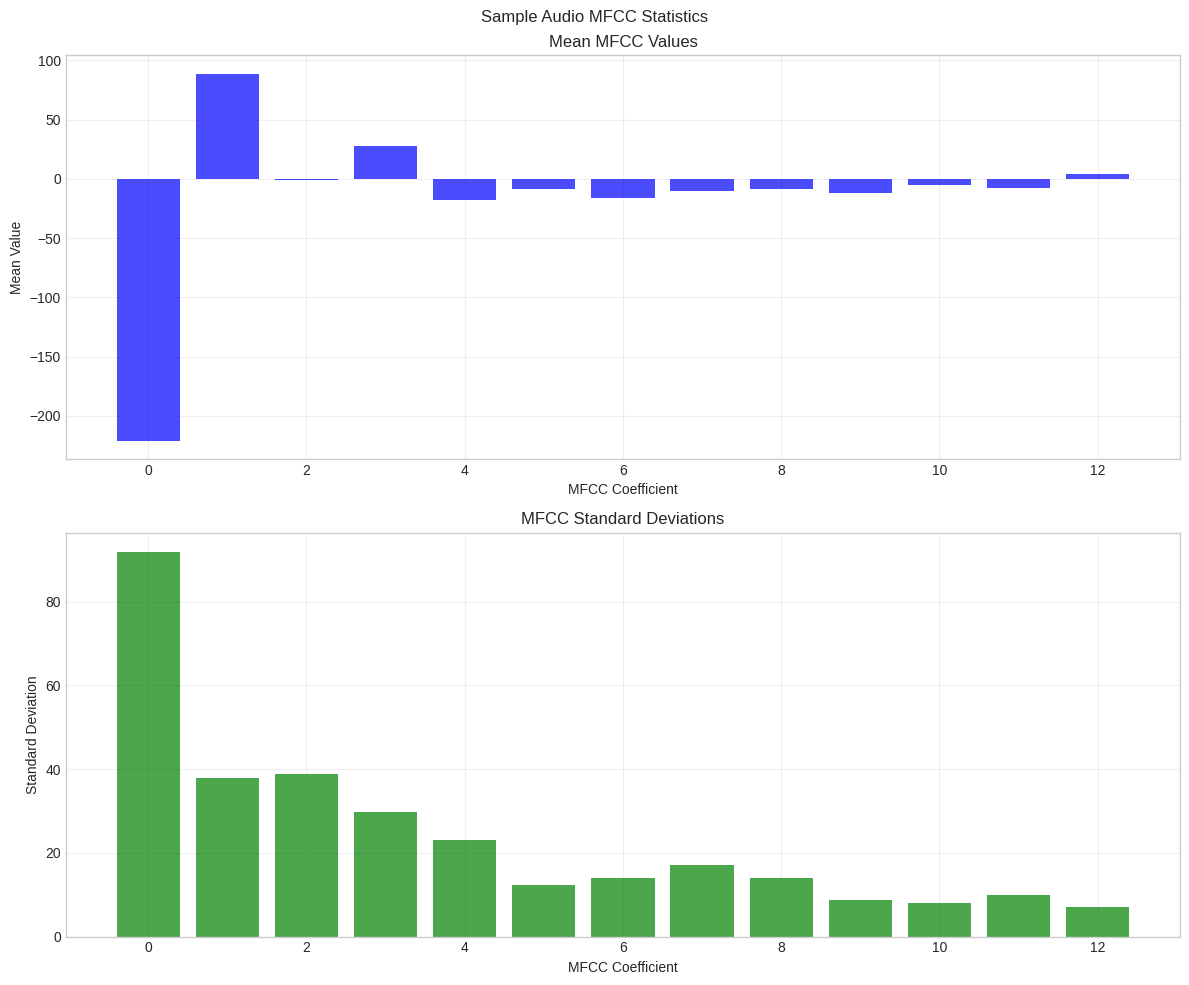

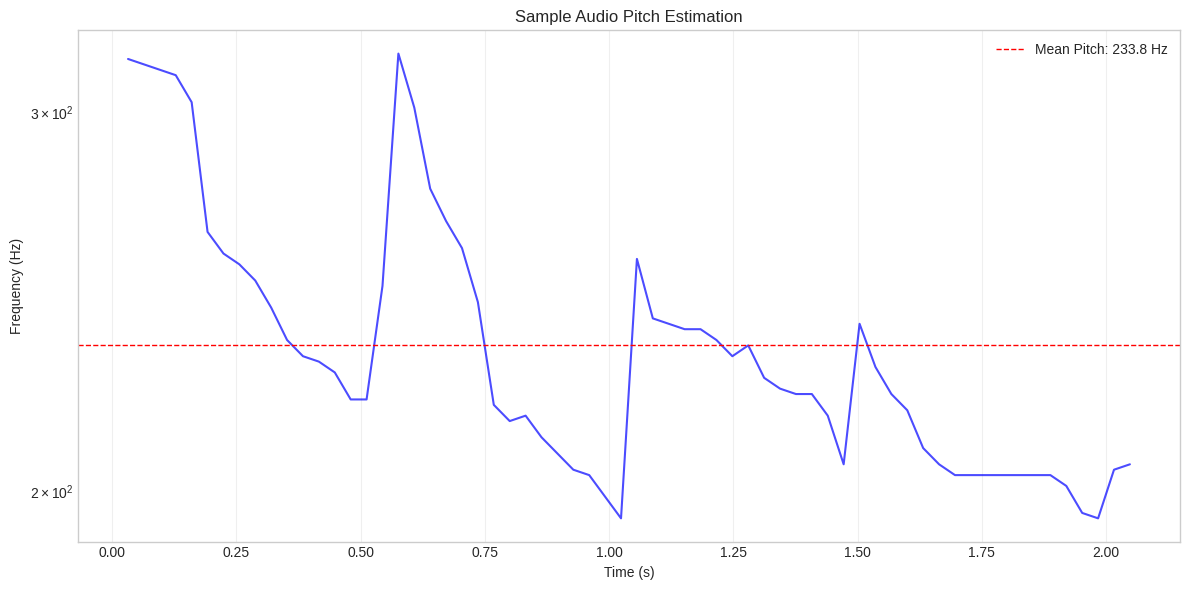

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [6]:
# Use our package's function to analyze pitch and timbre features
pitch_timbre_results = analyze_pitch_timbre(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the figures
for fig_name, fig in pitch_timbre_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Anomaly Detection

Let's use our package's analyze_anomalies function to detect anomalies in the audio.

2025-05-07 19:11:05,848 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Performing anomaly detection
2025-05-07 19:11:05,849 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Detecting amplitude anomalies with threshold 3.0
2025-05-07 19:11:05,851 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Detected 127 amplitude anomalous regions
2025-05-07 19:11:05,851 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Detecting spectral anomalies with contamination 0.05
2025-05-07 19:11:05,918 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Detected 4 spectral anomalous frames
2025-05-07 19:11:05,919 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Plotting amplitude anomalies
2025-05-07 19:11:05,975 - ctc_speech_refinement.core.eda.anomaly_detection - INFO - Plotting spectral anomalies


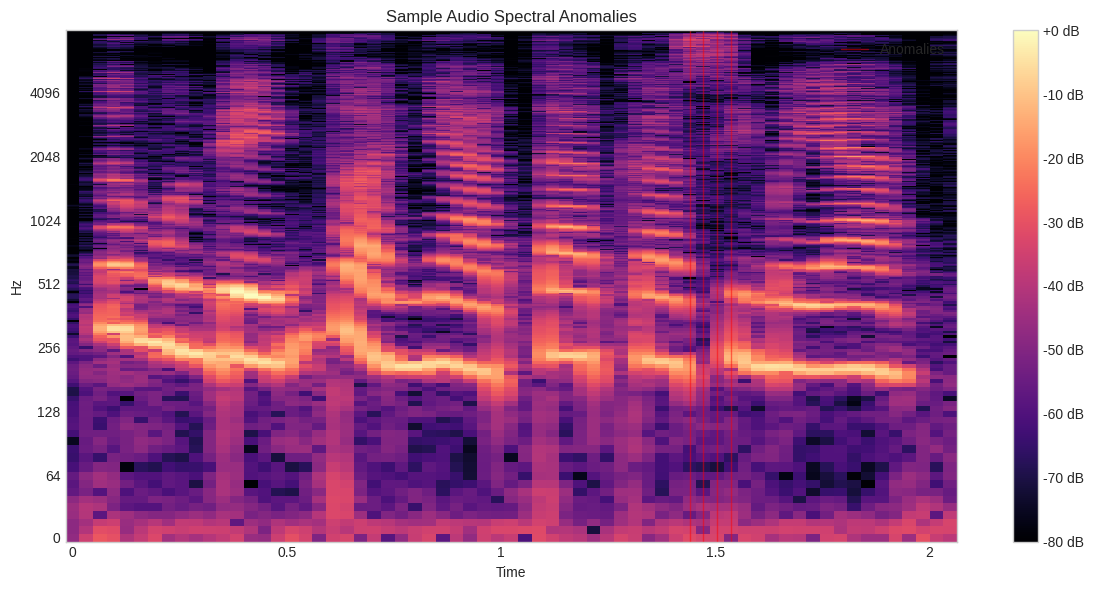

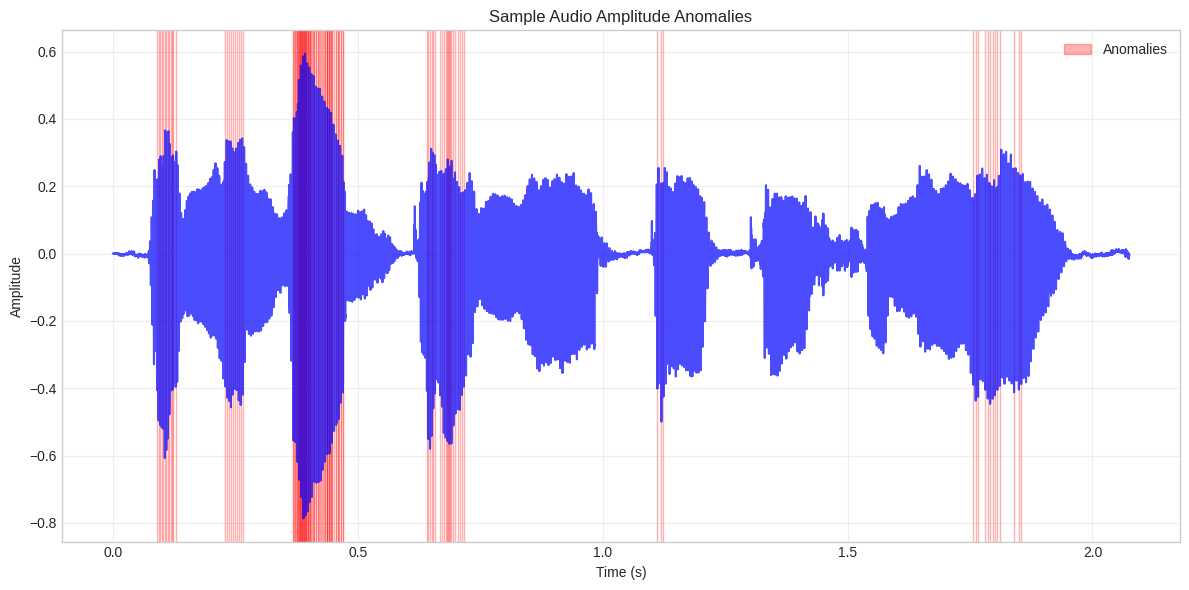

<Figure size 1200x600 with 0 Axes>

In [7]:
# Use our package's function to detect anomalies
anomaly_results = analyze_anomalies(audio_data, sample_rate, title_prefix="Sample Audio")

# Display the figures
for fig_name, fig in anomaly_results['figures'].items():
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## Silence Detection

Let's use our package's time domain analysis to detect silent regions in the audio.

Non-silent regions:


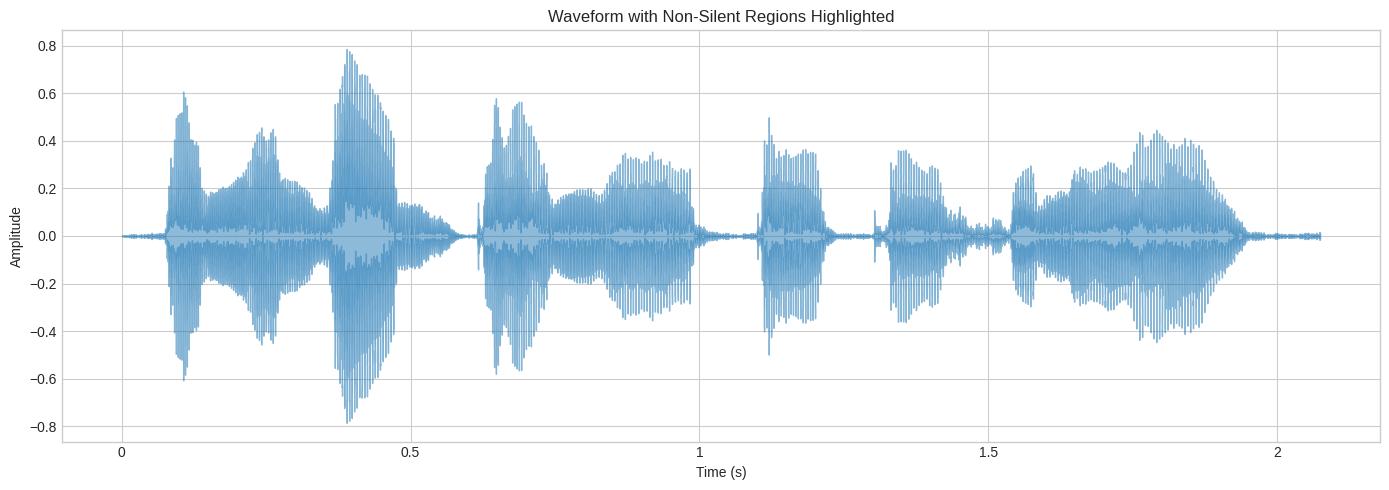

In [8]:
# Use our package's function to detect silent regions
silence_regions = time_domain_results['silent_regions']

# Print silent regions
print("Non-silent regions:")
for i, (start, end) in enumerate(silence_regions):
    print(f"Region {i+1}: {start:.2f}s - {end:.2f}s (duration: {end-start:.2f}s)")

# Plot waveform with non-silent regions highlighted
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_data, sr=sample_rate, alpha=0.5)

# Highlight non-silent regions
for start, end in silence_regions:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.title('Waveform with Non-Silent Regions Highlighted')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've performed a basic exploratory data analysis of an audio file using the CTC-SpeechRefinement package. We've examined its waveform, computed descriptive statistics, and analyzed it in both the time and frequency domains using the package's built-in functions. We've also analyzed pitch and timbre characteristics and detected anomalies in the audio.

This analysis provides a good starting point for understanding the characteristics of the audio data, which can be useful for preprocessing and feature extraction for speech recognition tasks.